In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
"""
Created on Sat Feb 25 16:57:00 2023

"""

import pandas as pd

df = pd.read_excel (r'/content/NIFTY_50_-_HistoricalPE_PBDIV_Data.xlsx') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
print (df)

           Date    P/E   P/B Div Yield %  Unnamed: 4  Composite Index  \
0    2022-08-12  21.18  4.15        1.35         NaN        65.108889   
1    2022-08-11  21.29  4.18        1.36         NaN        65.435441   
2    2022-08-10  21.11  4.21        1.34         NaN        66.323209   
3    2022-08-08  21.02  4.21        1.33         NaN        66.536992   
4    2022-08-05  20.86  4.18        1.29         NaN        67.592868   
...         ...    ...   ...         ...         ...              ...   
5872 1999-01-07  12.46  2.22        1.71         NaN        16.176140   
5873 1999-01-06  12.11  2.16        1.75         NaN        14.947200   
5874 1999-01-05  11.84  2.11        1.79         NaN        13.956648   
5875 1999-01-04  11.72  2.08        1.81         NaN        13.468287   
5876 1999-01-01  11.62  2.07        1.83         NaN        13.143934   

      Unnamed: 6  Unnamed: 7  
0            NaN  225.975000  
1            NaN    6.885786  
2            NaN   67.592868  

# New section

In [ ]:
a = df['Composite Index'].dropna().values
print(a)


[65.10888889 65.43544118 66.32320896 ... 13.95664804 13.46828729
 13.14393443]


# New section

In [ ]:
#len(a)
x = [0]*(len(a)-59)
for i in range(len(x)):
  x[i] = i+1

#print(x)

NameError: ignored

In [ ]:
#Entropy array
entropy = [0]*(len(a) - 59)

for k in range(len(a) - 59):
  arr = a[0+k:60+k]
  n=0
  arr.sort()
  div=10.0
  h = (arr[59]-arr[0])/div
  count = [0]*int(div)
  for i in range(0,60):

      if((arr[0]+n*h)<=arr[i]<arr[0]+h*(n+1)):
          count[n]+=1
          #print("value: ",arr[i],"lies between:",(arr[0]+n*h),"and: ",arr[0]+h*(n+1))
      
      else:
        if(n==9):
              count[n]+=1
              break
        n+=1
        count[n]+=1

  #print(count)
  sum=0
  prob = [0]*int(div)
  for i in range(len(count)):
    prob[i] = count[i]/60
    try:
      sum = sum+prob[i]*math.log(prob[i])
    except:
      continue
  #print(prob)
  entropy[k] = -sum
print(entropy)
#print(len(entropy))

[2.1330687364596193, 2.167341484332582, 2.1616781831060687, 2.165505266165063, 2.2202015261950567, 2.191291206465998, 2.2277045740882926, 2.2109155877875506, 2.207939822017133, 2.175163077355431, 2.219282189447769, 2.2027599214029054, 2.153876717457281, 2.213117815561966, 2.1853340815883633, 2.1940391190068294, 2.200742676485223, 2.1848823804757513, 2.1895295089310154, 2.1564982824918406, 2.182946870957214, 2.196710055588067, 2.168998703469628, 2.166828175194886, 2.167763276919783, 2.1628837011305024, 2.163522292169243, 2.127185066609293, 2.151185225894615, 2.159044381593102, 2.171238493919682, 2.2319000014309447, 2.213006287732542, 2.2144741616164025, 2.2262841646817146, 2.1834796431161774, 2.2222421902405767, 2.2084820275243353, 2.23737641273133, 2.243710004496257, 2.25672373461174, 2.240402214401219, 2.2434933221398503, 2.2456955499142657, 2.220620863455201, 2.2049538688054846, 2.1352173581622886, 2.1790222875214655, 2.1477177791400757, 2.1600929182168187, 2.1052338517413274, 2.0869

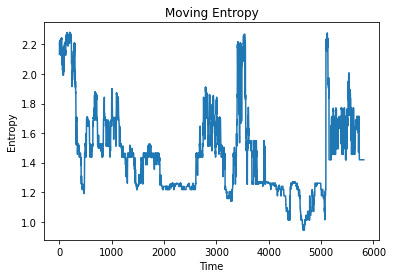

In [ ]:
plt.plot(x,entropy)
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.title('Moving Entropy')
plt.show()